In [1]:
import pandas as pd


df = pd.read_csv("datasetsahmed.csv")


df.head()


,Sold_On,Size,Ingredients_Cost,Design_Complexity,Time_Taken,Price,Amount,Gender
0,Monday,large,28,complex,6,49,10,female
1,Saturday,medium,65,simple,2,93,9,female
2,Wednesday,large,96,simple,5,128,8,male
3,Tuesday,medium,155,simple,3,198,6,female
4,Saturday,large,20,simple,2,32,5,male


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sold_On            4000 non-null   object
 1   Size               4000 non-null   object
 2   Ingredients_Cost   4000 non-null   int64 
 3   Design_Complexity  4000 non-null   object
 4   Time_Taken         4000 non-null   int64 
 5   Price              4000 non-null   int64 
 6   Amount             4000 non-null   int64 
 7   Gender             4000 non-null   object
dtypes: int64(4), object(4)
memory usage: 250.1+ KB


In [6]:
df.describe()

,Ingredients_Cost,Time_Taken,Price,Amount
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,111.552500,4.683000,154.680750,5.455000
std,57.863428,2.830285,76.282079,2.871591
min,10.000000,1.000000,14.000000,1.000000
25%,62.000000,2.750000,90.000000,3.000000
50%,113.000000,4.000000,154.000000,5.000000
75%,162.000000,6.000000,217.000000,8.000000
max,210.000000,11.000000,329.000000,10.000000


In [7]:
df.isnull().sum()

Sold_On              0
Size                 0
Ingredients_Cost     0
Design_Complexity    0
Time_Taken           0
Price                0
Amount               0
Gender               0
dtype: int64

In [12]:
from sklearn.preprocessing import StandardScaler


numeric_features = ['Ingredients_Cost', 'Time_Taken', 'Amount']


scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

 
df.head()


,Ingredients_Cost,Design_Complexity,Time_Taken,Price,Amount,Gender,Sold_On_Friday,Sold_On_Monday,Sold_On_Saturday,Sold_On_Sunday,Sold_On_Thursday,Sold_On_Tuesday,Sold_On_Wednesday,Size_large,Size_medium,Size_small
0,-1.444141,0,0.465382,49,1.582944,0,False,True,False,False,False,False,False,True,False,False
1,-0.804624,1,-0.948080,93,1.234662,0,False,False,True,False,False,False,False,False,True,False
2,-0.268813,1,0.112017,128,0.886379,1,False,False,False,False,False,False,True,True,False,False
3,0.750957,1,-0.594714,198,0.189814,0,False,False,False,False,False,True,False,False,True,False
4,-1.582415,1,-0.948080,32,-0.158469,1,False,False,True,False,False,False,False,True,False,False


In [13]:

X = df.drop('Price', axis=1)
y = df['Price']


In [14]:
from sklearn.ensemble import RandomForestRegressor

 
model = RandomForestRegressor(random_state=42)


In [15]:
from sklearn.model_selection import train_test_split

 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:

model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


y_pred = model.predict(X_test)

 
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

 
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


Mean Absolute Error: 9.743147410714286
Mean Squared Error: 158.02087928196073
Root Mean Squared Error: 12.570635595782766


In [19]:

sample = X_test.iloc[0].values.reshape(1, -1)
sample_df = pd.DataFrame(sample, columns=X_test.columns)  
predicted_price = model.predict(sample_df)
print(f"Predicted Price for the sample: {predicted_price[0]}")


Predicted Price for the sample: 88.93


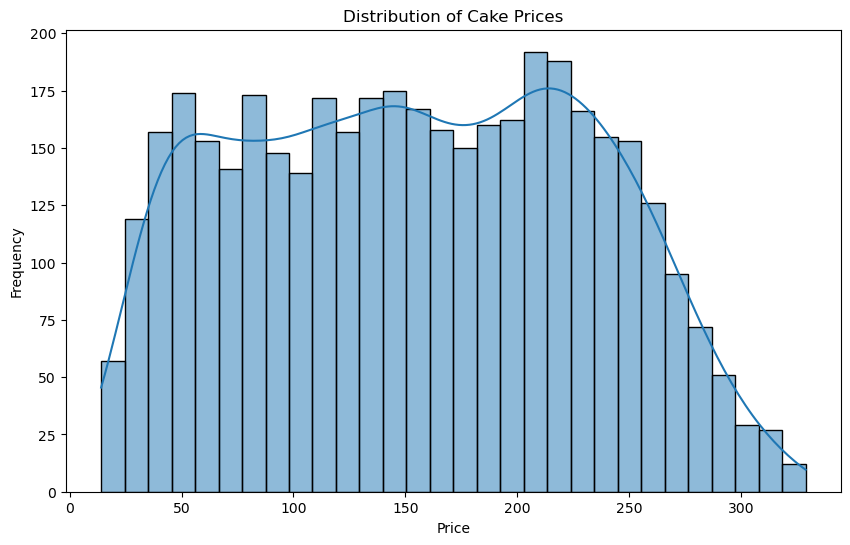

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Cake Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


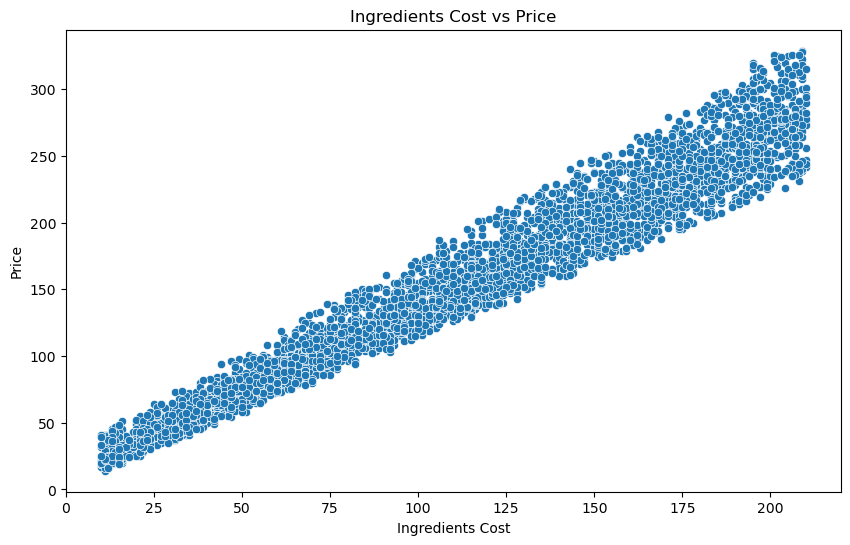

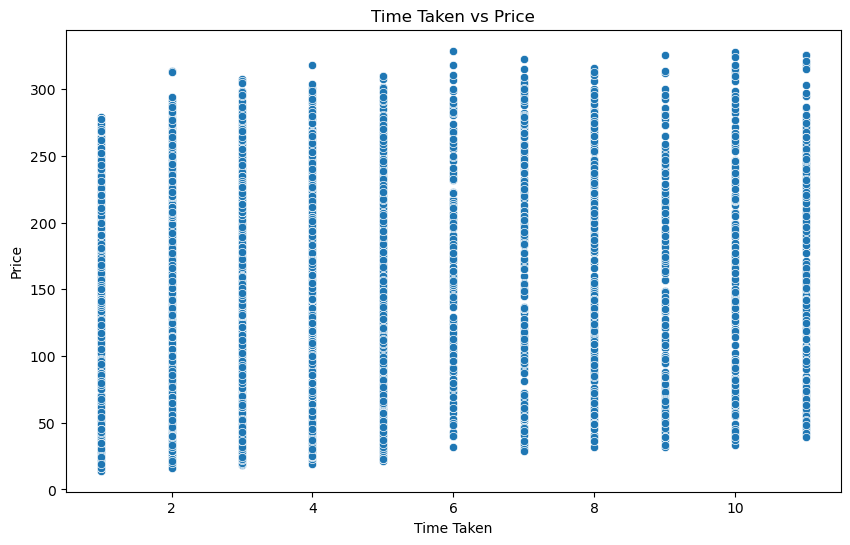

In [30]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Ingredients_Cost', y='Price', data=df)
plt.title('Ingredients Cost vs Price')
plt.xlabel('Ingredients Cost')
plt.ylabel('Price')
plt.show()

 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time_Taken', y='Price', data=df)
plt.title('Time Taken vs Price')
plt.xlabel('Time Taken')
plt.ylabel('Price')
plt.show()


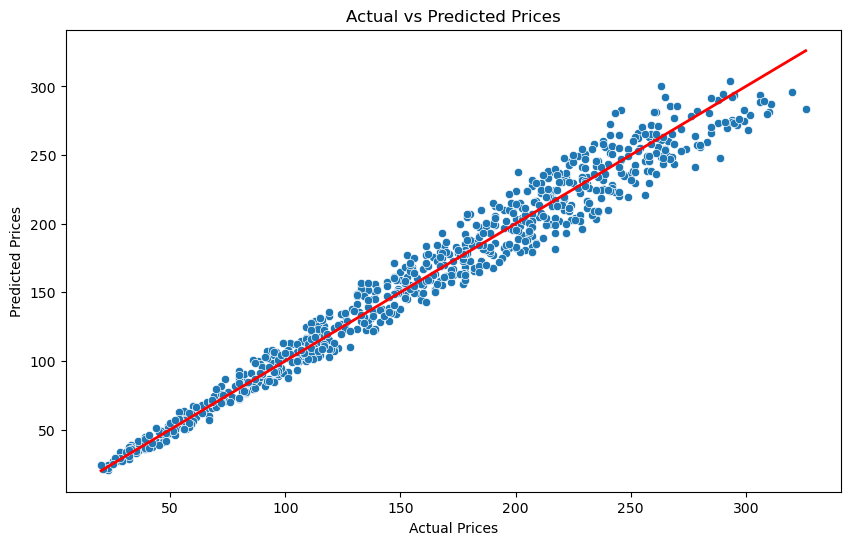

In [31]:
 
y_pred = model.predict(X_test)


comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=comparison_df)
plt.plot([comparison_df['Actual'].min(), comparison_df['Actual'].max()], [comparison_df['Actual'].min(), comparison_df['Actual'].max()], color='red', lw=2)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()
